<a href="https://colab.research.google.com/github/AikyaKumar/AikyaKumar/blob/main/Exercise_4_Data_Analytics_Exercise_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Global_Life_Expectancy_1960-2022.csv to Global_Life_Expectancy_1960-2022 (27).csv
Missing Values per Column:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
Region              0
                 ... 
2019                8
2020                8
2021                7
2022                8
SpecialNotes      127
Length: 70, dtype: int64

Missing Values After Imputation:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
                 ..
2019              0
2020              0
2021              0
2022              0
SpecialNotes      0
Length: 70, dtype: int64
0      74.992000
1      62.879000
2      61.929000
3      76.833000
4      72.416519
         ...    
212    79.524000
213    63.720000
214    61.480000
215    61.803000
216    59.391000
Name: 2022, Length: 217, dtype: float64
0      74.992000
1      62.879000
2      61.929000
3      76.833000
4      72.416519
         ...    
212    

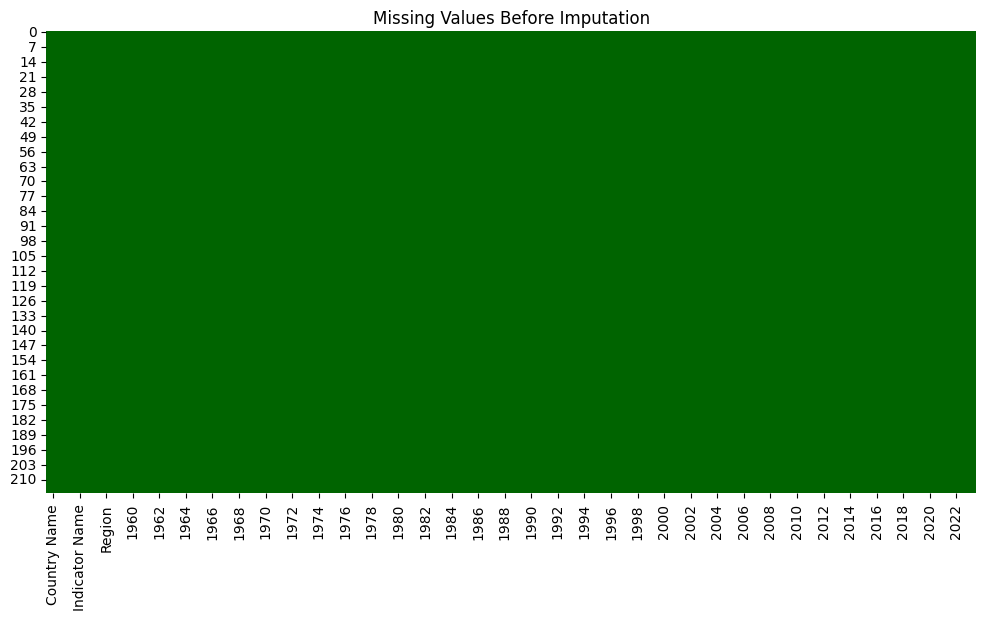

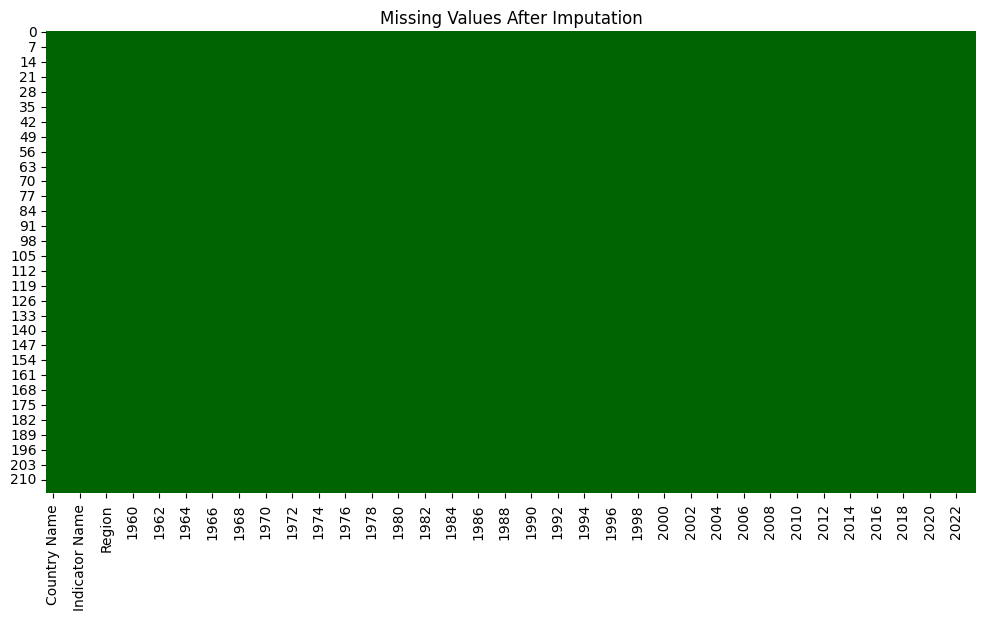

        2022  2022_scaled_z  2022_scaled_minmax
0  74.992000   3.410477e-01            0.679277
1  62.879000  -1.262967e+00            0.305188
2  61.929000  -1.388767e+00            0.275849
3  76.833000   5.848347e-01            0.736133
4  72.416519  -1.881815e-15            0.599738


         2022  2022_noisy  2022_smoothed_ma  2022_smoothed_ewm
0  74.992000   84.880807               NaN          84.880807
1  62.879000   54.145590         61.851026          64.390663
2  61.929000   46.526681         57.979662          54.182673
3  76.833000   73.266714         65.948503          64.360828
4  72.416519   78.052114         75.931882          71.427298


 Outliers:
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, Region, IncomeGroup, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1

In [75]:
# Import necessary libraries
import numpy as np  # For numerical computations like arrays and matrices
import pandas as pd  # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating visualizations like plots and charts
import seaborn as sns  # For statistical data visualization
from sklearn.feature_selection import RFE, mutual_info_regression  # For feature selection
from sklearn.linear_model import LinearRegression, Lasso  # For linear regression and Lasso regression
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
!pip install statsmodels # installing the statsmodels library
import statsmodels.api as sm  # For statistical modeling
from sklearn.feature_selection import mutual_info_regression  # For mutual information-based feature selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For data scaling


from google.colab import files
uploaded = files.upload()
df=pd.read_csv("Global_Life_Expectancy_1960-2022.csv")
df.head(10) # Display the first 10 rows of the DataFrame

# -------------------- Handling Missing Values --------------------

# 1. Identify Missing Values:
missing_values = df.isnull().sum() # Calculate the number of missing values in each column
print("Missing Values per Column:\n", missing_values)

# 2. Impute Missing Values:

# Example using mean imputation for numerical columns:
for column in df.select_dtypes(include=np.number).columns:
    df[column] = df[column].fillna(df[column].mean()) # Fill missing values with the column's mean

# Example using mode imputation for categorical columns:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify if any missing values remain
print("\nMissing Values After Imputation:\n", df.isnull().sum())

# Handling Missing Values (specifically for the '2022' column)

# Mean
df_imputed_mean=df['2022'].fillna(df['2022'].mean())
print(df_imputed_mean)

# Median
df_imputed_median=df['2022'].fillna(df['2022'].median())
print(df_imputed_median)

# Mode
df_imputed_mode=df['2022'].fillna(df['2022'].mode()[0])
print(df_imputed_median)

# Heatmap Before Imputation (Visualizing missing values)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)  # Using custom cmap
plt.title('Missing Values Before Imputation')
plt.show()

# Heatmap After Imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)  # Using custom cmap
plt.title('Missing Values After Imputation')
plt.show()

# -------------------- Scaling --------------------

# Scaling the "2022" column
# 1. Standardization (Z-score)
scaler = StandardScaler()
df['2022_scaled_z'] = scaler.fit_transform(df[['2022']])

# 2. Normalization (Min-Max scaling)
scaler = MinMaxScaler()
df['2022_scaled_minmax'] = scaler.fit_transform(df[['2022']])

# Display the DataFrame with scaled columns
print(df[['2022', '2022_scaled_z', '2022_scaled_minmax']].head())

# -------------------- Injecting Noise and Smoothing --------------------

# Injecting Noise
noise = np.random.normal(0, 5, df['2022'].shape)  # Adjust noise parameters
df['2022_noisy'] = df['2022'] + noise

# Smoothing/Noise Removal Techniques
# 1. Moving Average
df['2022_smoothed_ma'] = df['2022_noisy'].rolling(window=3, center=True).mean()

# 2. Exponential Smoothing
df['2022_smoothed_ewm'] = df['2022_noisy'].ewm(alpha=0.5).mean()  # Adjust alpha

# Display the DataFrame with noisy and smoothed columns
print("\n\n",df[['2022', '2022_noisy', '2022_smoothed_ma', '2022_smoothed_ewm']].head())

# -------------------- Detecting and Handling Outliers --------------------

# Outlier Detection using Z-score
# 1. Calculate Z-scores
df['2022_zscore'] = (df['2022'] - df['2022'].mean()) / df['2022'].std()

# 2. Define outlier threshold
threshold = 3  # Adjust as needed

# 3. Identify outliers
outliers = df[(df['2022_zscore'] > threshold) | (df['2022_zscore'] < -threshold)]

# Display the outliers
print("\n\n Outliers:")
print(outliers)

#Handling outliers

# Remove outliers from the DataFrame
df = df[~df.index.isin(outliers.index)]  # Keep rows that are NOT in the outliers DataFrame
print("\n\n Handling outliers using removal of outliers\n")
print(df)

# Apply log transformation to the '2022' column
df['2022_log'] = np.log(df['2022'] + 1)  # Add 1 to avoid log(0) errors if there are zeros
print("\nHandling outliers using Log Transformation\n",df[['2022', '2022_log']].head())

# -------------------- Feature Selection --------------------

# Feature Selection using Filter Methods
# 1. Correlation-based Feature Selection
numerical_df = df.select_dtypes(include=np.number)
correlations = numerical_df.corr()['2022'].abs().sort_values(ascending=False)  # Calculate absolute correlations with '2022'
top_features_corr = correlations[1:6].index  # Select top 5 features (excluding '2022' itself)

# 2. Mutual Information-based Feature Selection

X = df.drop('2022', axis=1).select_dtypes(include=np.number)  # Select numerical features only
y = df['2022']  # Target variable ('2022')

# Impute missing values in X before calculating MI scores
# Example using mean imputation:
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

mi_scores = mutual_info_regression(X, y)
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
top_features_mi = mi_scores_df.sort_values(by='MI Score', ascending=False)[:5].index

# Print selected features
print("\n\n Top features based on correlation:", top_features_corr)
print("\n Top features based on mutual information:", top_features_mi)

# Feature Selection using Wrapper Methods

# 1. Recursive Feature Elimination (RFE)
X = df.drop('2022', axis=1).select_dtypes(include=np.number)  # Select numerical features
y = df['2022']  # Target variable

# Impute missing values in X (if any)
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

# Create and fit the base model (e.g., Linear Regression)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]
print("\n\n Selected features using RFE:", selected_features_rfe)

# 2. Backward Elimination

def backward_elimination(X, y, significance_level=0.05):
    """Performs backward elimination to select features.

    Args:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
        significance_level (float): Significance level for p-values.

    Returns:
        list: Selected features.
    """
    features = list(X.columns)
    while True:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues[1:]  # Exclude the intercept
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break
    return features

selected_features_backward = backward_elimination(X, y)
print("\n\n Selected features using Backward Elimination:", selected_features_backward)

# Feature Selection using Embedded Methods (Lasso Regression)

X = df.drop('2022', axis=1).select_dtypes(include=np.number)  # Select numerical features
y = df['2022']  # Target variable

# Impute missing values in X (if any)
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X, y)

# Get the selected features (features with non-zero coefficients)
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("\n\n Selected features using Lasso:", selected_features_lasso)